# **Capstone Project Module 2** 
<br> **Analisis Amazon AWS SaaS Sales Dataset** 
---


Notebook berikut merupakan tugas akhir dari module dua program Data Science di Purwadhika Digital School. Dalam notebook ini penulis berperan sebagai data analis dari perusahaan Amazon yang ditugaskan untuk menjawab pertanyaan yang berkaitan dengan bisnis dan tantangan yang dihadapi perusahaan menggunakan dataset yang diberikan.  

Ditulis oleh **Agung Pratama Putra**, JCDS 2604

---

## **Latar Belakang**

Perangkat Lunak sebagai Layanan (SaaS) secara tradisional dianggap sebagai model perangkat lunak berbasis cloud yang menghadirkan aplikasi kepada pengguna akhir melalui peramban internet. Vendor SaaS meng-host layanan dan aplikasi bagi pelanggan untuk mengakses sesuai permintaan. Dengan penawaran SaaS, Anda tidak perlu lagi memikirkan cara memelihara layanan atau cara mengelola infrastruktur yang mendasarinya; Anda hanya perlu memikirkan cara menggunakan perangkat lunak tersebut. Aspek umum lainnya dari model SaaS adalah harga yang dibayarkan berdasarkan model langganan atau bayar sesuai penggunaan, tanpa harus membeli semua fungsionalitas sekaligus dalam satu paket besar.

https://aws.amazon.com/id/what-is/saas/

## **Dataset Preparation** 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import folium
from geopy.geocoders import Nominatim
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

## **Rumusan Masalah**

Perusahaan SaaS adalah perusahaan yang menjual berbagai macam perangkat lunak kepada perusahaan lain (B2B). Perusahaan tersebut kemudian mengumpulkan data transaksi dari pelanggan mereka dan mempekerjakan seorang data scientist untuk menganalisis dataset tersebut agar mereka dapat memperoleh wawasan lebih untuk meningkatkan kinerja perusahaan di masa depan.

Wawasan khusus yang mereka butuhkan adalah sebagai berikut:
1. Perusahaan perlu memilih 5 produk dengan margin tertinggi untuk memprioritaskan alokasi sumber daya mereka di bidang R&D.
1. Perusahaan perlu memilih 3 industri dengan keuntungan tertinggi untuk memprioritaskan industri mana yang harus mereka fokuskan.
1. Perusahaan perlu mengetahui 5 negara dengan penjualan tertinggi untuk memperluas tim dan jaringan mereka di wilayah tersebut.
1. Perusahaan perlu mengetahui keuntungan setiap kuartal untuk membantu dalam pengalokasian sumber daya.
1. Perusahaan ingin mengetahui korelasi antara penjualan dan diskon untuk mengukur efektivitas diskon yang diberikan.


## **Data Understanding**

In [26]:
df =pd.read_csv(r"C:\Users\Agung\Downloads\SaaS-Sales.csv")
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Dataset ini berisi data transaksi dari perusahaan SaaS yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dataset ini, setiap baris mewakili satu transaksi/pesanan (9.994 transaksi), dan kolom-kolomnya mencakup:

1. Row ID: Pengenal unik untuk setiap transaksi.
1. Order ID: Pengenal unik untuk setiap pemesanan.
1. Order Date: Tanggal ketika pesanan dibuat.
1. Date Key: Representasi numerik dari tanggal pesanan (YYYYMMDD).
1. Contact Name: Nama orang yang membuat pesanan.
1. Country: Negara tempat pesanan dibuat.
1. City: Kota tempat pesanan dibuat.
1. Region: Wilayah (benua) tempat pesanan dibuat.
1. Subregion: Subwilayah (sub benua) tempat pesanan dibuat.
1. Customer: Nama perusahaan yang membuat pesanan.
1. Customer ID: Pengenal unik untuk setiap pelanggan (perusahaan).
1. Industry: Industri/bidang/spesialisasi pelanggan.
1. Segment: Segmen pelanggan (SMB, Strategic, Enterprise).
1. Product: Nama produk yang dipesan.
1. License: Kunci lisensi unik untuk produk.
1. Sales: Jumlah total penjualan untuk transaksi.
1. Quantity: Jumlah total item dalam transaksi.
1. Discount: Diskon yang diterapkan pada transaksi(skala 0-1).
1. Profit: Keuntungan dari transaksi tersebut.

## **Data Cleaning**

 ### 1. Data Type

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### 2. Check Missing Value

In [28]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [29]:
df.duplicated().sum()

0

### 3. Change Data Type

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### 4. Add New Columns

In [31]:
df['Order Month'] = df['Order Date'].dt.month # Kolom Bulan Pemesanan
df['Order Year'] = df['Order Date'].dt.year # Kolom Tahun Pemesanan

df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,11,2022
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,11,2022
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,6,2022
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,10,2021
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,10,2021


### 5. Check for Mischaracterization

In [32]:
np.sort(df['Country'].unique())

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Taiwan',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [33]:
np.sort(df['City'].unique())

array(['Abu Dhabi', 'Adelaide', 'Aichi', 'Alexandria', 'Alicante',
       'Amsterdam', 'Anaheim', 'Ankara', 'Antofagasta', 'Antwerp',
       'Arlington', 'Athens', 'Atlanta', 'Auckland', 'Aurora', 'Austin',
       'Baltimore', 'Bandung', 'Bangalore', 'Barcelona', 'Bari',
       'Beijing', 'Belfast', 'Belo Horizonte', 'Berlin', 'Birmingham',
       'Bogotá', 'Bologna', 'Brasília', 'Brescia', 'Brighton', 'Brisbane',
       'Bristol', 'Brno', 'Brussels', 'Buenos Aires', 'Buffalo',
       'Burlington', 'Bursa', 'Busan', 'Cabo San Lucas', 'Cairo',
       'Calgary', 'Cali', 'Canberra', 'Cancun', 'Cape Town', 'Cardiff',
       'Catania', 'Charlotte', 'Chengdu', 'Chennai', 'Chiba', 'Chicago',
       'Cleveland', 'Clinton', 'Cologne', 'Columbia', 'Columbus',
       'Copenhagen', 'Cork', 'Córdoba', 'Daegu', 'Dallas', 'Davao City',
       'Delhi', 'Denver', 'Detroit', 'Dhahran', 'Doha', 'Donetsk',
       'Dresden', 'Dubai', 'Dublin', 'Edinburgh', 'Espoo', 'Everett',
       'Florence', 'Fort Worth

In [34]:
np.sort(df['Customer'].unique())

array(['AT&T', 'Abbott Laboratories', 'Aetna', 'Airbus', 'Allianz',
       'Allstate', 'Alphabet', 'Amazon', 'American Express',
       'AmerisourceBergen', 'Anthem', 'Apple', 'Aviva', 'BMW',
       'BNP Paribas', 'Banco Santander', 'Bank of America Corp.',
       'Berkshire Hathaway', 'Boeing', 'Bosch', 'CVS Health', 'Carrefour',
       'Caterpillar', 'Chevron', 'China National Petroleum', 'Cigna',
       'Cisco Systems', 'Citigroup', 'Coca-Cola', 'Comcast',
       'ConocoPhillips', 'Costco Wholesale', 'Daimler', 'Enel', 'Engie',
       'Exxon Mobil', 'Fannie Mae', 'FedEx', 'Ford Motor', 'Gazprom',
       'General Electric', 'General Motors', 'Glencore',
       'Goldman Sachs Group', 'HSBC Holdings', 'Home Depot',
       'HonHai Precision Industry', 'Honda Motor', 'Huawei', 'Humana',
       'Intel', 'Itochu', 'J.P. Morgan Chase & Co.', 'Johnson & Johnson',
       'Kroger', 'Lowes', 'Lukoil', 'Marathon Petroleum', 'McKesson',
       'Merck', 'Microsoft', 'Mitsubishi', 'Mondelez Interna

In [35]:
np.sort(df['Industry'].unique())

array(['Communications', 'Consumer Products', 'Energy', 'Finance',
       'Healthcare', 'Manufacturing', 'Misc', 'Retail', 'Tech',
       'Transportation'], dtype=object)

In [36]:
np.sort(df['Segment'].unique())

array(['Enterprise', 'SMB', 'Strategic'], dtype=object)

In [37]:
np.sort(df['Product'].unique())

array(['Alchemy', 'Big Ol Database', 'ChatBot Plugin', 'ContactMatcher',
       'Data Smasher', 'FinanceHub', 'Marketing Suite',
       'Marketing Suite - Gold', 'OneView', 'SaaS Connector Pack',
       'SaaS Connector Pack - Gold', 'Site Analytics', 'Storage',
       'Support'], dtype=object)

### 6. Outliers Check

In [38]:
# Identify potential outliers in 'Sales','Quantity','Discount','Profit' using the interquartile range (IQR) method
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

Q1_discount = df['Discount'].quantile(0.25)
Q3_discount = df['Discount'].quantile(0.75)
IQR_discount = Q3_discount - Q1_discount
lower_bound_discount = Q1_discount - 1.5 * IQR_discount
upper_bound_discount = Q3_discount + 1.5 * IQR_discount

Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

outliers_sales = df[(df['Sales'] < lower_bound_sales) | (df['Sales'] > upper_bound_sales)]
outliers_quantity = df[(df['Quantity'] < lower_bound_quantity) | (df['Quantity'] > upper_bound_quantity)]
outliers_discount = df[(df['Discount'] < lower_bound_discount) | (df['Discount'] > upper_bound_discount)]
outliers_profit = df[(df['Profit'] < lower_bound_profit) | (df['Profit'] > upper_bound_profit)]

In [39]:
print(len(outliers_sales))
print(len(outliers_discount))
print(len(outliers_quantity))
print(len(outliers_profit))

1167
856
170
1881


### 7. Drop Columns

In [40]:
df.drop(['Date Key','Contact Name','City'], axis =1, inplace = True) 
df.head()

,Row ID,Order ID,Order Date,Country,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,1,EMEA-2022-152156,2022-11-09,Ireland,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,11,2022
1,2,EMEA-2022-152156,2022-11-09,Ireland,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,11,2022
2,3,AMER-2022-138688,2022-06-13,United States,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,6,2022
3,4,EMEA-2021-108966,2021-10-11,Germany,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,10,2021
4,5,EMEA-2021-108966,2021-10-11,Germany,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,10,2021


### 8. Remaining Columns

In [41]:
df[['Row ID','Order ID','Order Date','Country','Region','Subregion','Customer','Customer ID',
    'Industry','Segment','Product','License','Sales','Quantity','Discount','Profit']].nunique()

Row ID         9994
Order ID       5009
Order Date     1237
Country          48
Region            3
Subregion        12
Customer         99
Customer ID      99
Industry         10
Segment           3
Product          14
License        9994
Sales          5825
Quantity         14
Discount         12
Profit         7287
dtype: int64

## **Data Analysis**

### Descriptive Statistics

In [42]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## **Insight, Visualization and Recomendation**

### 1. Top 5 Product with Highest Margin

In [43]:
# Show top five product with highest amount of Profit and Sales
df = df.groupby('Product')[['Profit','Sales']].sum()
df.head()

,Profit,Sales
Product,,
Alchemy,55617.8249,149528.030
Big Ol Database,3384.7569,189238.631
ChatBot Plugin,6527.7870,27118.792
ContactMatcher,12496.2822,410378.265
Data Smasher,41936.6357,167380.318


In [44]:
# Calculate margin in percentage (Profit-Sales)*100
df_margin = df['Margin (%)']=round(df['Profit']/df['Sales']*100)
df_margin = df.sort_values(by='Margin (%)', ascending=False).head().reset_index()
df_margin.head()

,Product,Profit,Sales,Margin (%)
0,SaaS Connector Pack - Gold,6964.1767,16476.402,42.0
1,Alchemy,55617.8249,149528.030,37.0
2,Storage,949.5182,3024.280,31.0
3,Support,32864.4698,125152.744,26.0
4,Data Smasher,41936.6357,167380.318,25.0


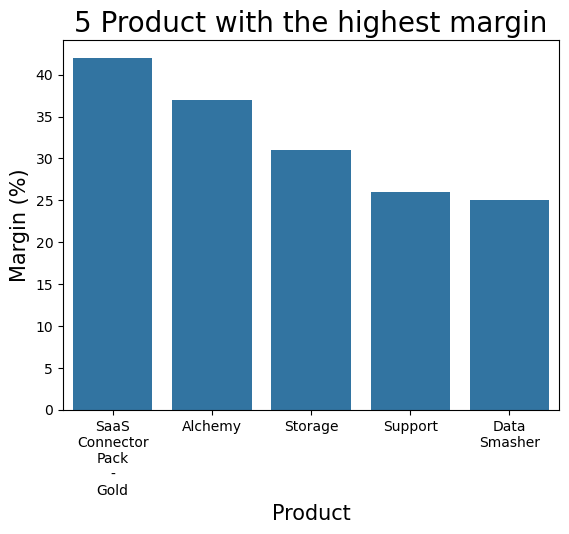

In [45]:
# Show barplot with product as x axis and margin (%) as y axis
sns.barplot(data=df_margin, x='Product', y='Margin (%)')
plt.xticks(ticks=range(len(df_margin['Product'])), labels=[label.replace(' ', '\n') for label in df_margin['Product']], fontsize=10) 
plt.yticks(fontsize=10)
plt.xlabel(df_margin.columns[0], fontsize=15)
plt.ylabel(df_margin.columns[-1], fontsize=15)
plt.title('5 Product with the highest margin', fontsize=20)
plt.show()

**Wawasan 1: <br> SaaS Connector Pack - Gold, Alchemy, Storage, Support, dan Data Smasher adalah 5 produk dengan margin tertinggi**<br>
<br>**Rekomendasi: <br> Alokasikan Sumber Daya R&D Secara Strategis.**<br>
<br>Karena diketahui SaaS Connector Pack - Gold, Alchemy, Storage, Support, dan Data Smasher adalah produk-produk dengan margin tertinggi, disarankan untuk mengalokasikan lebih banyak sumber daya dan fokus pada peningkatan dan pengembangan lebih lanjut dari produk-produk ini. Pertimbangkan untuk berinvestasi di R&D guna menambahkan fitur baru, meningkatkan pengalaman pengguna, dan mengatasi masalah yang dilaporkan oleh pelanggan. Investasi ini dapat menghasilkan profitabilitas lebih tinggi yang didapat dari fitur-fitur baru dalam program dan meningkatkan kepuasan pelanggan yang lebih baik. Selain itu, analisis secara khusus faktor-faktor yang membuat produk-produk ini sukses, dan coba terapkan elemen-elemen serupa ke dalam produk lain untuk mengoptimalkan margin produk lainnya juga.

### 2. Top 3 Industry with Highest Profit

In [ ]:
# Show amount of profit based on industry
df_industry = df.groupby('Industry')[['Profit']].sum()
df_industry.head()


In [ ]:
# Sort by 3 highest Profit, then reset index so that Industry became new column instead of index before
df_industry = df_industry.sort_values(by='Profit', ascending=False).head(3).reset_index()
df_industry

In [ ]:
sns.barplot(data=df_industry, x='Industry', y='Profit')
plt.xticks(ticks=range(len(df_margin['Industry'])), labels=[label.replace(' ', '\n') for label in df_industry['Industry']], fontsize=10) 
plt.yticks(fontsize=10)
plt.xlabel(df_margin.columns[0], fontsize=15)
plt.ylabel(df_margin.columns[-1], fontsize=15)
plt.title('Top 3 Industry with The Highest Amount of Profit', fontsize=20)
plt.show()

**Wawasan 2: <br>Keuangan, Energi, dan Manufaktur adalah 3 industri dengan keuntungan tertinggi**<br>
<br>**Rekomendasi: <br>Sesuaikan penawaran produk dan strategi pemasaran untuk secara khusus menargetkan industri-industri ini.**<br>
<br>Industri Keuangan, Energi, dan Manufaktur menghasilkan keuntungan tertinggi. Untuk memanfaatkan wawasan ini, pertimbangkan untuk menyesuaikan penawaran produk dan strategi pemasaran Anda agar secara khusus menargetkan industri-industri ini. Kembangkan solusi khusus yang memenuhi kebutuhan dan tantangan unik dari masing-masing industri. Hal ini akan membantu Anda mempertahankan kehadiran yang kuat dan menarik lebih banyak pelanggan di sektor-sektor dengan keuntungan tinggi ini.

### 3. Top 5 Country with Highest Amount of Sales

In [ ]:
# Show 5 country with highest amount of sales
df_salesCountry = df.groupby('Country')[['Sales']].sum().apply(lambda x: round(x,2))
df_salesCountry.head()

In [ ]:
# Sort by 5 highest Sales, then reset index so that Country became new column instead of index before
df_salesCountry = df_salesCountry.sort_values(by='Sales', ascending=False).head().reset_index()
df_salesCountry

In [ ]:
# Create function to get latitude and longitude by inputing Country
def get_country_coordinates(country_name):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.geocode(country_name, exactly_one=True)
    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None, None

# Add latitude and longitude columns to df3 by appending list with function result
latitude=[]
longitude=[]
for i in df_salesCountry['Country']:
    lat, long = get_country_coordinates(i)
    latitude.append(lat)
    longitude.append(long)
df_salesCountry['Latitude']=latitude
df_salesCountry['Longitude']=longitude
df_salesCountry

In [ ]:
# Create folium map using latitude and longitude in the center of world map, then inputing df_salesCountry data for each country marker.
world_map = folium.Map(location=[29.6166068,7.8992381], zoom_start=2)
for i in df_salesCountry.index:
    country_marker = folium.Marker(location = [df_salesCountry['Latitude'][i],df_salesCountry['Longitude'][i]],
                                tooltip = df_salesCountry['Country'][i], 
                                popup = f"Sales\n{df_salesCountry['Sales'][i]}", 
                                icon= folium.Icon(icon='flag'))
    country_marker.add_to(world_map)

world_map

**Wawasan 3: <br>Amerika Serikat, Inggris, Jepang, Kanada, dan Prancis adalah 5 negara dengan penjualan tertinggi**<br>
<br>**Rekomendasi: <br>Perluas Tim Penjualan dan Jaringan di Negara-Negara Utama.**<br>
<br>Amerika Serikat, Inggris, Jepang, Kanada, dan Prancis adalah negara-negara dengan penjualan tertinggi. Untuk memperluas jaringan di wilayah-wilayah ini, pertimbangkan untuk membentuk tim penjualan dan dukungan lokal di masing-masing negara tersebut. Membangun hubungan dengan bisnis lokal dan menghadiri acara industri akan membantu Anda semakin memasuki pasar-pasar ini dan memanfaatkan potensi penjualan yang kuat.

### 4. Quarterly Profit

In [ ]:
# Create profit per quarter by sum Profit for each date
df_quarterly = df.pivot_table(values='Profit',index='Order Date',aggfunc=np.sum)
df_quarterly.head()

In [ ]:
# Sum Profit for each quarter using .resample('Q').sum, then reset index so that Order Date became new column instead of index before
df_quarterly = df_quarterly.resample('Q').sum().reset_index()
df_quarterly['Profit'] = df_quarterly['Profit'].apply(lambda x: round(x,2))

In [ ]:
# Create list for xticks by change YYYY-MM-DD to Q\nYYYY
date_ranges = []
start_date = df_quarterly['Order Date'].min()
end_date = df_quarterly['Order Date'].max()
while start_date <= end_date:
    formatted_date_range = f"Q{start_date.quarter}\n{start_date.year}"
    date_ranges.append(formatted_date_range)
    start_date = start_date + pd.DateOffset(months=3)
date_ranges

In [ ]:
# Create lineplot from df_quarterly using Order Date as x-axis and Profit as y-axis
sns.lineplot(data=df_quarterly, x='Order Date', y='Profit', label='Profit')
plt.xticks(df_quarterly['Order Date'][1::2],date_ranges[1::2], fontsize=10)      # Make xticks only shows Q2 and Q4 in each year
plt.yticks(fontsize=10)
plt.xlabel(df_quarterly.columns[0], fontsize=15)
plt.ylabel(df_quarterly.columns[-1], fontsize=15)
plt.title('Each quarter Profit', fontsize=20)
plt.show()

**Wawasan 4: <br>Kuartal keempat selalu menghasilkan keuntungan tertinggi, sedangkan kuartal pertama biasanya menghasilkan keuntungan terendah**<br>
<br>**Rekomendasi: <br>Alokasi Sumber Daya Berdasarkan Wawasan Kuartalan.**<br>
<br>Memahami pola keuntungan kuartalan sangat penting untuk alokasi sumber daya. Karena diketahui kuartal keempat secara konsisten menghasilkan keuntungan tertinggi dan kuartal pertama cenderung memiliki keuntungan terendah, alokasikan sumber daya tambahan dan upaya pemasaran menjelang kuartal keempat. Rencanakan promosi, peluncuran produk, dan kampanye penjualan selama periode ini untuk memaksimalkan keuntungan dan mengimbangi potensi penurunan di kuartal pertama.

### 5. Correlation between Sales and Discount

In [ ]:
# Create df5 from Sales and Discount
df_cor = df[['Sales','Discount']]
df_cor.head()

In [ ]:
# Normality test using Shapiro Wilk test on sales and discount with alpha(0.05)
alpha = 0.05
for i in df_cor.columns:
    sh = shapiro(df_cor[i])
    if sh[1] > alpha:
        print(f'{i}, Shapiro Wilk Test Result:')
        print(f"pvalue = {sh[1]} is greater than alpha({alpha}).\nFail to reject Ho, therefore {i} is normally distributed.\n")
    else:
        print(f'{i}, Shapiro Wilk Test Result:')
        print(f"pvalue = {sh[1]} is less or equal than alpha({alpha}).\nReject Ho, therefore {i} is not normally distributed.\n")

In [ ]:
# Normality test by using histogram
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
sns.histplot(df_cor['Sales'], bins=20, kde=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Sales Histogram', fontsize=20)

plt.subplot(1,2,2)
sns.histplot(df_cor['Discount'], bins=20, kde=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Discount', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Discount Histogram', fontsize=20)

plt.show()

In [ ]:
# Using Spearman Correlation instead of Pearson Correlation on df5 because Sales or Discount are not normally distributed.
df_cor = df_cor.corr(method='spearman').apply(lambda x: round(x,2)) 
df_cor         

In [ ]:
# Heatmap for the correlation between sales and discount
sns.heatmap(df_cor, annot=True, cmap='seismic', center=0)
plt.show()

**Wawasan 5: <br>Penjualan dan Diskon memiliki hubungan negatif yang lemah**<br>
<br>**Rekomendasi: <br>Analisis Efektivitas Strategi Diskon.**<br>
<br>Berdasarkan uji statistik, didapat korelasi yang rendah antara penjualan dan diskon. Mengingat korelasi negatif yang lemah antara penjualan dan diskon, penting untuk mengevaluasi strategi diskon Anda dengan hati-hati. Pertimbangkan untuk melakukan pengujian lebih lanjut untuk mengukur dampak berbagai diskon terhadap penjualan. Pantau perilaku pelanggan dan pola pembelian secara cermat selama periode diskon. Sesuaikan strategi diskon Anda berdasarkan wawasan yang diperoleh untuk menemukan keseimbangan yang tepat antara meningkatkan penjualan dan mempertahankan margin keuntungan yang sehat.